In [ ]:
from google.colab import files
uploaded = files.upload()

Saving all-data.csv to all-data (3).csv


In [ ]:
#!pip install text_hammer
import cv2
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import cm
import text_hammer as th
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm_notebook as tqdm

In [ ]:
import requests
from bs4 import BeautifulSoup
from transformers import BertTokenizer, BertForSequenceClassification, pipeline
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
#rom keras.utils.all_utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
# Assuming the file is named 'data.csv'
for file_name in uploaded.keys():
    df = pd.read_csv(file_name, encoding='latin1')  # Try 'latin1' or other encodings if 'utf-8' fails

# Display the first few rows of the dataframe
print(df.head())

    neutral  \
0   neutral   
1  negative   
2  positive   
3  positive   
4  positive   

  According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  
0  Technopolis plans to develop in stages an area...                                                                               
1  The international electronic industry company ...                                                                               
2  With the new production plant the company woul...                                                                               
3  According to the company 's updated strategy f...                                                                               
4  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...                                                                               


In [ ]:
# Rename the columns for clarity
df.columns = ['Sentence', 'Sentiment']
new_df = df.copy()
new_df['Sentiment'] = df['Sentence']
new_df['Sentence'] = df['Sentiment']

df = new_df
# Display the new DataFrame with content swapped
print(df.head())

                                            Sentence Sentiment
0  Technopolis plans to develop in stages an area...   neutral
1  The international electronic industry company ...  negative
2  With the new production plant the company woul...  positive
3  According to the company 's updated strategy f...  positive
4  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...  positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   4845 non-null   object
 1   Sentiment  4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


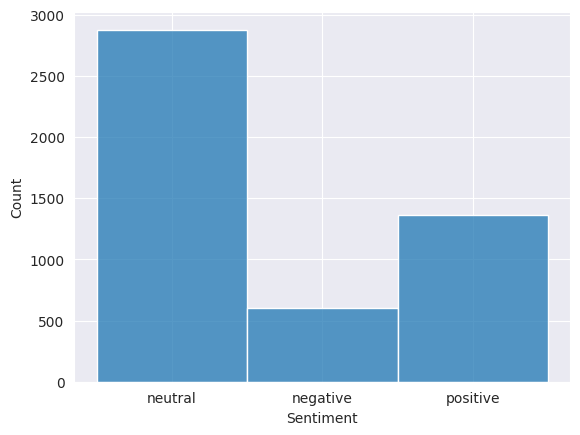

In [ ]:
# Set the font family to handle missing glyphs
plt.rcParams['font.family'] = 'DejaVu Sans'

# Plot the histogram
sns.set_style('darkgrid')
sns.histplot(x='Sentiment', data=df)
plt.show()

In [ ]:
df['len'] = list(map(lambda x: len(str(x).split(' ')),df['Sentence']))
df.head()

,Sentence,Sentiment,len
0,Technopolis plans to develop in stages an area...,neutral,31
1,The international electronic industry company ...,negative,36
2,With the new production plant the company woul...,positive,33
3,According to the company 's updated strategy f...,positive,41
4,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,positive,25


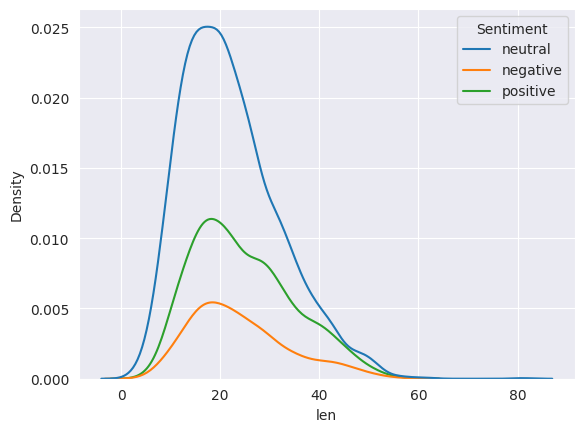

In [ ]:
sns.kdeplot(x='len',hue='Sentiment',data=df)
plt.show()

In [ ]:
mapdf = {'positive':0,'negative':1,'neutral':2}
df['Sentiment'] = list(map(lambda x:mapdf[x],df['Sentiment']))
df.head()

,Sentence,Sentiment,len
0,Technopolis plans to develop in stages an area...,2,31
1,The international electronic industry company ...,1,36
2,With the new production plant the company woul...,0,33
3,According to the company 's updated strategy f...,0,41
4,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,0,25


In [ ]:
print(df['Sentiment'].corr(df['len']))

-0.11371005239377509


In [ ]:
sentences = df['Sentence'].copy()[:]
sentences = sentences.to_list()
sentences = list(map(lambda x: x.lower(),sentences))
sentences = list(map(lambda x: th.cont_exp(x),sentences))
sentences = list(map(lambda x: th.remove_emails(x),sentences))
sentences = list(map(lambda x: th.remove_emails(x),sentences))
sentences = list(map(lambda x: th.remove_html_tags(x),sentences))
sentences = list(map(lambda x: th.remove_stopwords(x),sentences))
sentences = list(map(lambda x: th.remove_special_chars(x),sentences))
sentences = list(map(lambda x: th.remove_accented_chars(x),sentences))
sentences = list(map(lambda x: th.make_base(x),sentences))

In [ ]:
sentences[:3]

['technopoli plan develop stage area 100000 square meter order host company work computer technology telecommunication statement say',
 'international electronic industry company elcoteq lay ten employee tallinn facility contrary early layoff company contract rank office worker daily postimee report',
 'new production plant company increase capacity meet expect increase demand improve use raw material increase production profitability']

In [ ]:
import nltk
from tqdm import tqdm

# Download 'punkt' resource
# nltk.download('punkt')

In [ ]:
pairs = []
for sent in tqdm(sentences):
    pairs.extend(nltk.word_tokenize(sent))
freq = nltk.FreqDist(pairs)
freq.most_common(10)

100%|██████████| 4845/4845 [00:00<00:00, 8474.46it/s]


[('eur', 1015),
 ('company', 967),
 ('say', 595),
 ('mn', 515),
 ('finnish', 512),
 ('sale', 501),
 ('million', 441),
 ('share', 436),
 ('net', 413),
 ('profit', 413)]

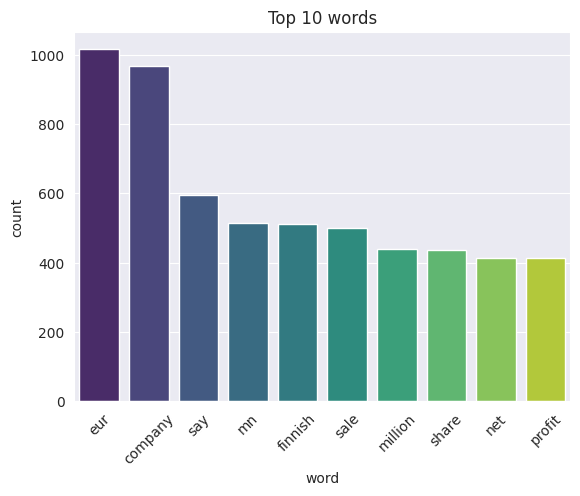

In [ ]:
# Plot the bar plot with different colors for each bar
tempdf = pd.DataFrame(freq.most_common(10),  columns=['word', 'count'])
sns.barplot(x='word', y='count', data=tempdf, palette='viridis')  # Change 'viridis' to any other palette you prefer
plt.title("Top 10 words")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
#pip install --upgrade keras

In [ ]:
#import tensorflow.keras as keras

In [ ]:
y = to_categorical(df['Sentiment'])
x = sentences.copy()
X_train,X_test, y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)

In [ ]:
num_words = 12000
tokenizer=Tokenizer(num_words,lower=True)
df_total = pd.concat([pd.Series(X_train), pd.Series(X_test)], axis = 0)
tokenizer.fit_on_texts(df_total)

In [ ]:
#from keras.preprocessing.sequence import pad_sequences
X_train_ =tokenizer.texts_to_sequences(X_train)
X_train_pad=pad_sequences(X_train_,maxlen=81,padding='post')
X_test_ = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_, maxlen = 81, padding = 'post')

In [ ]:
print(X_train_pad.shape,X_test_pad.shape)

(3391, 81) (1454, 81)


#LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Bidirectional,Embedding,Dropout

In [ ]:
lstm = Sequential()
lstm.add(Embedding(input_dim = num_words,
                          output_dim = 100,
                          input_length= X_train_pad.shape[1]))
lstm.add(Dropout(0.2))
lstm.add(Bidirectional(LSTM(128,return_sequences=True)))
lstm.add(Dropout(0.2))
lstm.add(Bidirectional(LSTM(256,return_sequences=True)))
lstm.add(Dropout(0.2))
lstm.add(Bidirectional(LSTM(128,return_sequences=False)))
lstm.add(Dense(64,activation='tanh'))
lstm.add(Dense(32,activation='tanh'))
lstm.add(Dense(10,activation='tanh'))
lstm.add(Dense(3,activation='softmax'))

In [ ]:
lstm.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('./model.keras', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [ ]:
lstm_history = lstm.fit(X_train_pad,y_train, epochs = 10, batch_size = 64, validation_data=(X_test_pad, y_test),verbose = 1, callbacks= [es, mc])

Epoch 1/10
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6040 - loss: 0.9111
Epoch 1: val_accuracy improved from -inf to 0.67056, saving model to ./model.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - accuracy: 0.6053 - loss: 0.9088 - val_accuracy: 0.6706 - val_loss: 0.7768
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7655 - loss: 0.5686
Epoch 2: val_accuracy improved from 0.67056 to 0.69464, saving model to ./model.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.7655 - loss: 0.5686 - val_accuracy: 0.6946 - val_loss: 0.7343
Epoch 3/10
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8878 - loss: 0.3168
Epoch 3: val_accuracy did not improve from 0.69464
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.8874 - loss: 0.3171 - val_accuracy: 0.6836 - val_loss: 0.8340
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9545 - loss: 0.1421
Epoch 4: val_accuracy did not improve from 0.69464
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step 

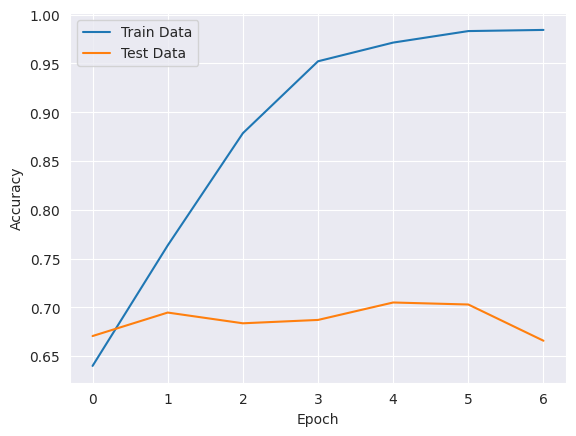

In [ ]:
plt.plot(lstm_history.history['accuracy'], label='Train Data')
plt.plot(lstm_history.history['val_accuracy'], label='Test Data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1])
plt.legend(loc='best')
plt.show()

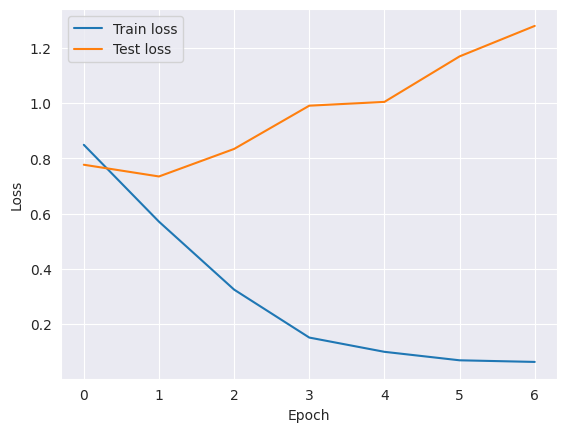

In [ ]:
plt.plot(lstm_history.history['loss'], label='Train loss')
plt.plot(lstm_history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
predictions = lstm.predict(X_test_pad)
target_names=['positive','negative','neutral']
print(classification_report(np.argmax(y_test,axis=1),np.argmax(predictions,axis=1),target_names=target_names))

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step
              precision    recall  f1-score   support

    positive       0.62      0.56      0.59       409
    negative       0.38      0.71      0.50       181
     neutral       0.82      0.70      0.76       864

    accuracy                           0.67      1454
   macro avg       0.61      0.66      0.61      1454
weighted avg       0.71      0.67      0.68      1454



#Glove + LSTM

In [ ]:
import gensim.downloader as api
glove_gensim  = api.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [ ]:
glove_gensim.most_similar(positive=['king','woman'],negative=['man'],topn=1)

[('queen', 0.6713277101516724)]

In [ ]:
vector_size = 300
gensim_weight_matrix = np.zeros((num_words ,vector_size))
gensim_weight_matrix.shape

for word, index in tqdm(tokenizer.word_index.items()):
    if index < num_words: # since index starts with zero
        try:
            gensim_weight_matrix[index] = glove_gensim[word]
        except:
            gensim_weight_matrix[index] = np.zeros(300)

100%|██████████| 9555/9555 [00:00<00:00, 145315.55it/s]


In [ ]:
gensim_weight_matrix.shape

(12000, 300)

In [ ]:
glove = Sequential()
glove.add(Embedding(input_dim = num_words,
                          output_dim = 300,
                          input_length= X_train_pad.shape[1],
                          weights = [gensim_weight_matrix],
                          trainable = False))
glove.add(Dropout(0.2))
glove.add(Bidirectional(LSTM(128,return_sequences=True)))
glove.add(Dropout(0.2))
glove.add(Bidirectional(LSTM(256,return_sequences=True)))
glove.add(Dropout(0.2))
glove.add(Bidirectional(LSTM(128,return_sequences=False)))
glove.add(Dense(64,activation='tanh'))
glove.add(Dense(32,activation='tanh'))
glove.add(Dense(10,activation='tanh'))
glove.add(Dense(3,activation='softmax'))

In [ ]:
glove.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │       3,600,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_9 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_10 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_11 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,600,000 (13.73 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,600,000 (13.73 MB)

In [ ]:
glove.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
glove_history = glove.fit(X_train_pad,y_train, epochs = 10, batch_size = 64, validation_data=(X_test_pad, y_test),verbose = 1, callbacks= [es, mc])

Epoch 1/10
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6019 - loss: 0.8747
Epoch 1: val_accuracy did not improve from 0.70495
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 82ms/step - accuracy: 0.6038 - loss: 0.8715 - val_accuracy: 0.6733 - val_loss: 0.7025
Epoch 2/10
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7117 - loss: 0.6624
Epoch 2: val_accuracy improved from 0.70495 to 0.72146, saving model to ./model.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.7119 - loss: 0.6618 - val_accuracy: 0.7215 - val_loss: 0.6595
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7495 - loss: 0.6046
Epoch 3: val_accuracy did not improve from 0.72146
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.7495 - loss: 0.6044 - val_accuracy: 0.7166 - val_loss: 0.6653
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7833 - loss: 0.5291
Epoch 4: val_accuracy improved from 0.72146 to 0.72627, saving model to ./model.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/st

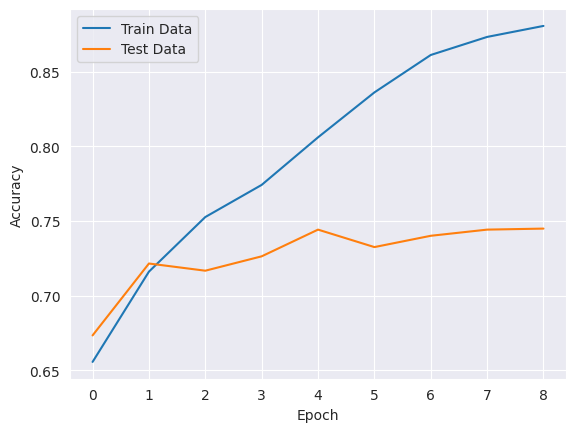

In [ ]:
plt.plot(glove_history.history['accuracy'], label='Train Data')
plt.plot(glove_history.history['val_accuracy'], label='Test Data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.98, 1])
plt.legend(loc='best')
plt.show()

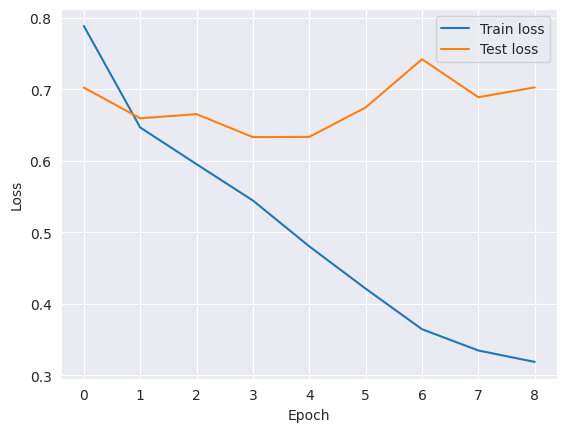

In [ ]:
plt.plot(glove_history.history['loss'], label='Train loss')
plt.plot(glove_history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [ ]:
predictions = glove.predict(X_test_pad)
target_names=['positive','negative','neutral']
print(classification_report(np.argmax(y_test,axis=1),np.argmax(predictions,axis=1),target_names=target_names))

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
              precision    recall  f1-score   support

    positive       0.63      0.67      0.65       409
    negative       0.62      0.60      0.61       181
     neutral       0.83      0.81      0.82       864

    accuracy                           0.74      1454
   macro avg       0.69      0.69      0.69      1454
weighted avg       0.75      0.74      0.75      1454



#Glove + GRU

In [ ]:
from keras.layers import GRU
gru = Sequential()
gru.add(Embedding(input_dim = num_words,
                          output_dim = 300,
                          input_length= X_train_pad.shape[1],
                          weights = [gensim_weight_matrix],
                          trainable = False))
gru.add(Dropout(0.2))
gru.add(Bidirectional(GRU(128,return_sequences=True)))
gru.add(Dropout(0.2))
gru.add(Bidirectional(GRU(256,return_sequences=True)))
gru.add(Dropout(0.2))
gru.add(Bidirectional(GRU(128,return_sequences=False)))
gru.add(Dense(64,activation='tanh'))
gru.add(Dense(32,activation='tanh'))
gru.add(Dense(10,activation='tanh'))
gru.add(Dense(3,activation='softmax'))

In [ ]:
gru.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │       3,600,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_12 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_13 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_14 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,600,000 (13.73 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,600,000 (13.73 MB)

In [ ]:
gru.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
gru_history = gru.fit(X_train_pad,y_train, epochs = 10, batch_size = 64, validation_data=(X_test_pad, y_test),verbose = 1, callbacks= [es, mc])

Epoch 1/10
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5957 - loss: 0.8744
Epoch 1: val_accuracy did not improve from 0.74484
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.5971 - loss: 0.8725 - val_accuracy: 0.6541 - val_loss: 0.8186
Epoch 2/10
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6964 - loss: 0.7160
Epoch 2: val_accuracy did not improve from 0.74484
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.6965 - loss: 0.7156 - val_accuracy: 0.6939 - val_loss: 0.7148
Epoch 3/10
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7332 - loss: 0.6379
Epoch 3: val_accuracy did not improve from 0.74484
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.7336 - loss: 0.6370 - val_accuracy: 0.7283 - val_loss: 0.6383
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7661 - loss: 0.5475
Epoch 4: val_accuracy improved from 0.74484 to 0.75447, saving model to ./model.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.7663 - loss: 0.547

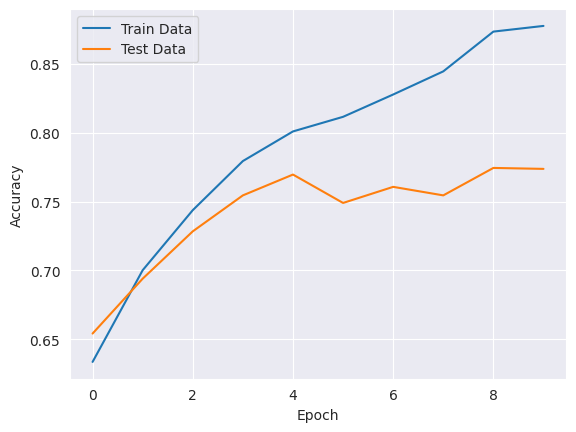

In [ ]:
plt.plot(gru_history.history['accuracy'], label='Train Data')
plt.plot(gru_history.history['val_accuracy'], label='Test Data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.7, 1])
plt.legend(loc='best')
plt.show()

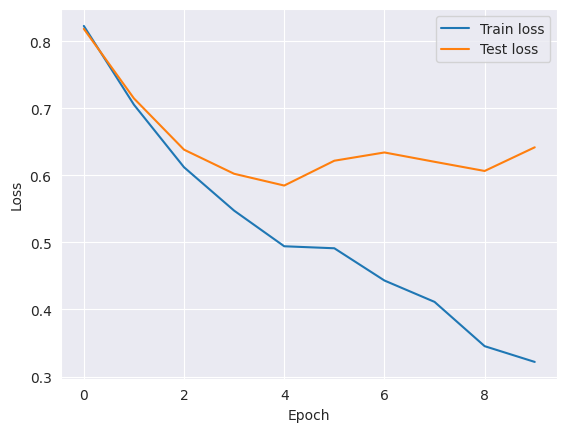

In [ ]:
plt.plot(gru_history.history['loss'], label='Train loss')
plt.plot(gru_history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [ ]:
predictions = gru.predict(X_test_pad)
target_names=['positive','negative','neutral']
print(classification_report(np.argmax(y_test,axis=1),np.argmax(predictions,axis=1),target_names=target_names))

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
              precision    recall  f1-score   support

    positive       0.75      0.61      0.67       409
    negative       0.69      0.65      0.67       181
     neutral       0.80      0.88      0.84       864

    accuracy                           0.77      1454
   macro avg       0.75      0.71      0.73      1454
weighted avg       0.77      0.77      0.77      1454



#Fasttext LSTM

In [ ]:
import gensim.downloader as api
glove_gensim  = api.load('fasttext-wiki-news-subwords-300')

[==================================================] 100.0% 958.5/958.4MB downloaded


In [ ]:
vector_size = 300
gensim_weight_matrix = np.zeros((num_words ,vector_size))
gensim_weight_matrix.shape

for word, index in tqdm(tokenizer.word_index.items()):
    if index < num_words: # since index starts with zero
        try:
            gensim_weight_matrix[index] = glove_gensim[word]
        except:
            gensim_weight_matrix[index] = np.zeros(300)

100%|██████████| 9555/9555 [00:00<00:00, 118326.44it/s]


In [ ]:
ftext = Sequential()
ftext.add(Embedding(input_dim = num_words,
                          output_dim = 300,
                          input_length= X_train_pad.shape[1],
                          weights = [gensim_weight_matrix],
                          trainable = False))
ftext.add(Dropout(0.2))
ftext.add(Bidirectional(LSTM(128,return_sequences=True)))
ftext.add(Dropout(0.2))
ftext.add(Bidirectional(LSTM(256,return_sequences=True)))
ftext.add(Dropout(0.2))
ftext.add(Bidirectional(LSTM(128,return_sequences=False)))
ftext.add(Dense(64,activation='tanh'))
ftext.add(Dense(32,activation='tanh'))
ftext.add(Dense(10,activation='tanh'))
ftext.add(Dense(3,activation='softmax'))

In [ ]:
ftext.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │       3,600,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_15 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_16 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_17 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,600,000 (13.73 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,600,000 (13.73 MB)

In [ ]:
ftext.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
ftext_history = ftext.fit(X_train_pad,y_train, epochs = 10, batch_size = 64, validation_data=(X_test_pad, y_test),verbose = 1, callbacks= [es, mc])

Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6037 - loss: 0.9360
Epoch 1: val_accuracy did not improve from 0.77442
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.6041 - loss: 0.9350 - val_accuracy: 0.6431 - val_loss: 0.8107
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6505 - loss: 0.7969
Epoch 2: val_accuracy did not improve from 0.77442
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.6506 - loss: 0.7968 - val_accuracy: 0.6582 - val_loss: 0.7728
Epoch 3/10
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6713 - loss: 0.7459
Epoch 3: val_accuracy did not improve from 0.77442
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.6711 - loss: 0.7459 - val_accuracy: 0.6802 - val_loss: 0.7212
Epoch 4/10
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6965 - loss: 0.6933
Epoch 4: val_accuracy did not improve from 0.77442
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.6965 - loss: 0.6933 - val_accuracy: 0.6994 - val_loss

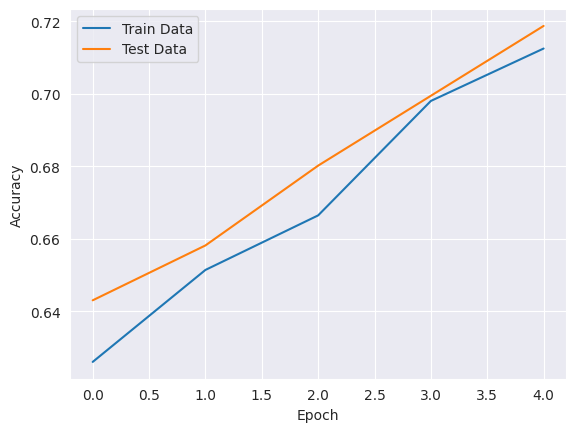

In [ ]:
plt.plot(ftext_history.history['accuracy'], label='Train Data')
plt.plot(ftext_history.history['val_accuracy'], label='Test Data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1])
plt.legend(loc='best')
plt.show()

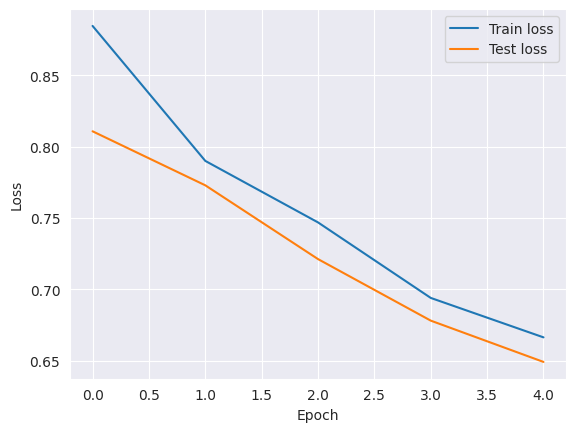

In [ ]:
plt.plot(ftext_history.history['loss'], label='Train loss')
plt.plot(ftext_history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [ ]:
predictions = ftext.predict(X_test_pad)
target_names=['positive','negative','neutral']
print(classification_report(np.argmax(y_test,axis=1),np.argmax(predictions,axis=1),target_names=target_names))

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
              precision    recall  f1-score   support

    positive       0.67      0.39      0.49       409
    negative       0.49      0.65      0.55       181
     neutral       0.79      0.89      0.84       864

    accuracy                           0.72      1454
   macro avg       0.65      0.64      0.63      1454
weighted avg       0.72      0.72      0.70      1454

